<a href="https://colab.research.google.com/github/Girija-Tandon/SuperMart-Grocery-Sales/blob/main/SuperMart-Grocery-Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Load the data**

In [ ]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

**Basic info**

In [ ]:
df.sample(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
6546,OD6547,Yadav,Bakery,Cakes,Nagercoil,12-02-2018,West,1900,0.10,722.00,Tamil Nadu
2390,OD2391,Shah,Beverages,Health Drinks,Perambalur,11/24/2017,West,2246,0.21,965.78,Tamil Nadu
9040,OD9041,Peer,Fruits & Veggies,Organic Fruits,Salem,11-02-2018,West,2040,0.23,632.40,Tamil Nadu
9424,OD9425,Suresh,"Eggs, Meat & Fish",Eggs,Tenkasi,7/24/2016,South,774,0.32,100.62,Tamil Nadu
8576,OD8577,Akash,Fruits & Veggies,Fresh Fruits,Ooty,09-08-2017,East,2210,0.14,950.30,Tamil Nadu


In [ ]:
df.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [ ]:
df.dtypes

,0
Order ID,object
Customer Name,object
Category,object
Sub Category,object
City,object
Order Date,object
Region,object
Sales,int64
Discount,float64
Profit,float64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


**Clean and convert columns**

In [ ]:
df['Profit'] = pd.to_numeric(df['Profit'],errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'],errors='coerce')
df['Discount']= pd.to_numeric(df['Discount'],errors='coerce')

In [ ]:
df['Order Date']= pd.to_datetime(df['Order Date'],dayfirst=True, errors='coerce')

# **Key Overall Statistics**

In [ ]:
total_sales = df['Sales'].sum()
total_Profit = df['Profit'].sum()
total_orders = len(df)
avg_discount = df['Discount'].mean()
profit_margin = (total_Profit / total_sales) * 100.0 if total_sales > 0 else 0
print("\n==== OverAll Stats ====")
print(f"Totla_Sales: {total_sales:,.2f}")
print(f"Totla_Profit: {total_Profit:,.2f}")
print(f"Totla_orders: {total_orders:,.2f}")
print(f"avg_discount: {avg_discount:,.2f}")
print(f"profit_margin: {profit_margin:,.2f}")
print(f"Number of Unique Customers : {df['Customer Name'].nunique()}")
print(f"Number of Unique City : {df['City'].nunique()}")
print(f"Date Range : {df['Order Date'].min().date()} to {df['Order Date'].max().date()}")



==== OverAll Stats ====
Totla_Sales: 14,956,982.00
Totla_Profit: 3,747,121.20
Totla_orders: 9,994.00
avg_discount: 0.23
profit_margin: 25.05
Number of Unique Customers : 50
Number of Unique City : 24
Date Range : 2015-01-02 to 2018-12-11


# **Sales and Profit by Category**

In [ ]:
print("\n==== Sales by Category ===")
sales_by_cat = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(sales_by_cat.apply(lambda x: f"₹{x:,.2f}"))
print("\n ==== Profit by Category ====")
Profit_by_cat = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print(Profit_by_cat.apply(lambda x : f"₹{x:,.2f}"))


==== Sales by Category ===
Category
Eggs, Meat & Fish    ₹2,267,401.00
Snacks               ₹2,237,546.00
Food Grains          ₹2,115,272.00
Bakery               ₹2,112,281.00
Fruits & Veggies     ₹2,100,727.00
Beverages            ₹2,085,313.00
Oil & Masala         ₹2,038,442.00
Name: Sales, dtype: object

 ==== Profit by Category ====
Category
Snacks               ₹568,178.85
Eggs, Meat & Fish    ₹567,357.22
Fruits & Veggies     ₹530,400.38
Food Grains          ₹529,162.64
Bakery               ₹528,521.06
Beverages            ₹525,605.76
Oil & Masala         ₹497,895.29
Name: Profit, dtype: object


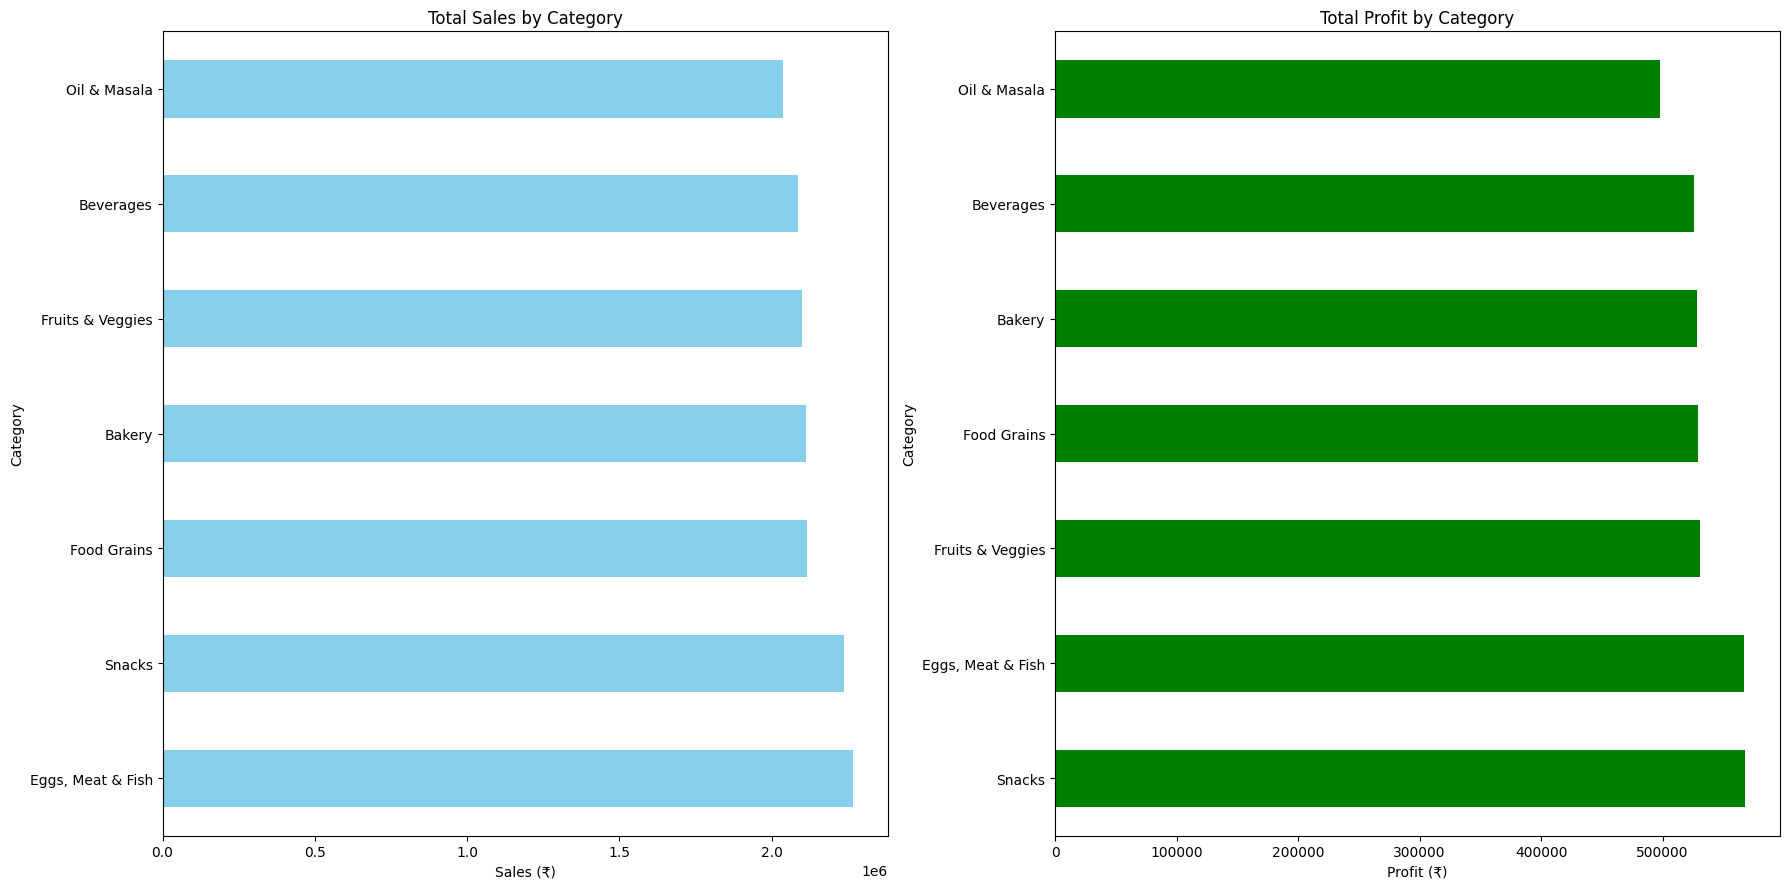

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
sales_by_cat.plot(kind='barh', ax=axes[0], color='skyblue', title='Total Sales by Category')
axes[0].set_xlabel('Sales (₹)')
Profit_by_cat.plot(kind='barh', ax=axes[1], color='green', title='Total Profit by Category')
axes[1].set_xlabel('Profit (₹)')
plt.tight_layout()
plt.show()

## **Sales and Profit by Sub Category (Top 10)**

In [ ]:
print("\n === Top 10 Sales by Sub Category ===")
top_sub = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_sub.apply(lambda x : f"₹{x:,.2f}"))
top_sub_profit = df.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_sub.apply(lambda x : f"₹{x:,.2f}"))


 === Top 10 Sales by Sub Category ===
Sub Category
Health Drinks    ₹1,051,439.00
Soft Drinks      ₹1,033,874.00
Cookies            ₹768,213.00
Breads & Buns      ₹742,586.00
Noodles            ₹735,435.00
Chocolates         ₹733,898.00
Masalas            ₹697,480.00
Cakes              ₹685,612.00
Biscuits           ₹684,083.00
Spices             ₹672,876.00
Name: Sales, dtype: object
Sub Category
Health Drinks    ₹1,051,439.00
Soft Drinks      ₹1,033,874.00
Cookies            ₹768,213.00
Breads & Buns      ₹742,586.00
Noodles            ₹735,435.00
Chocolates         ₹733,898.00
Masalas            ₹697,480.00
Cakes              ₹685,612.00
Biscuits           ₹684,083.00
Spices             ₹672,876.00
Name: Sales, dtype: object


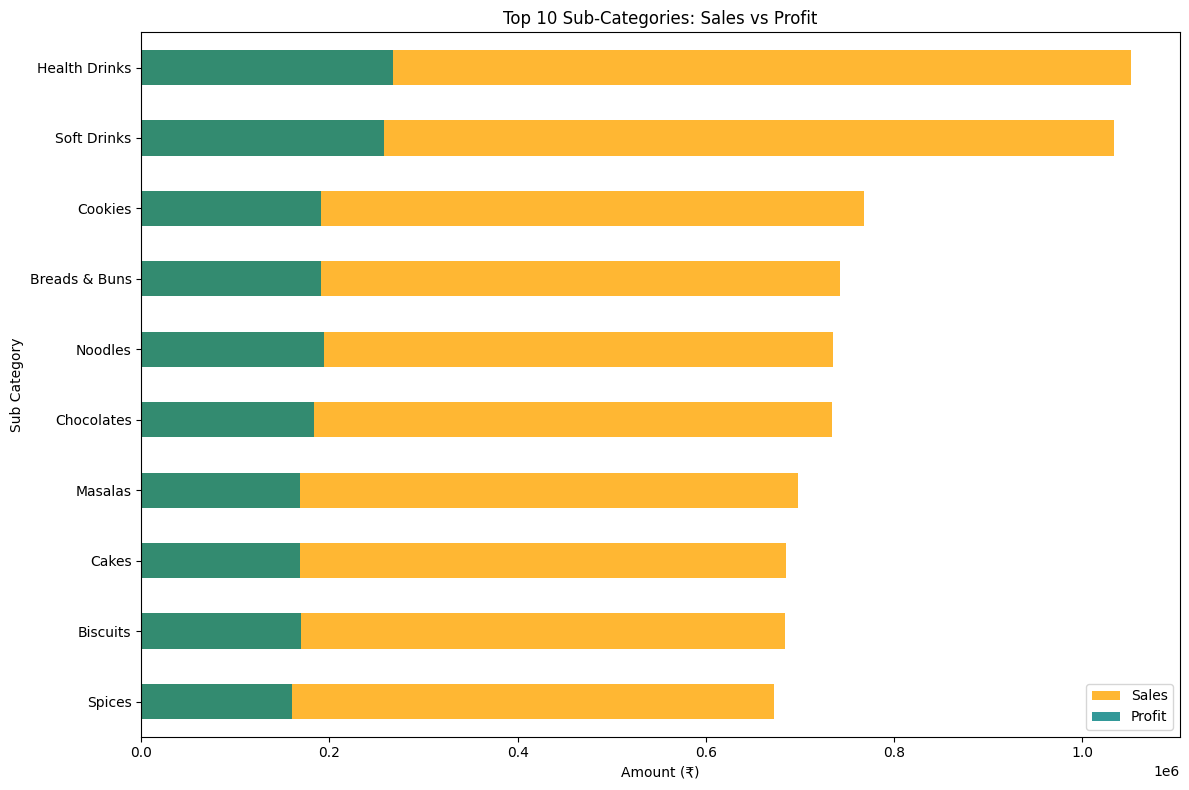

In [ ]:
import matplotlib.pyplot as plt

# Top 10 Sub-Categories by Sales
top_sales = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_profit = df.groupby('Sub Category')['Profit'].sum().loc[top_sales.index]

# Combined DataFrame, sorted for horizontal bars
top = pd.DataFrame({'Sales': top_sales, 'Profit': top_profit}).sort_values('Sales')

# Plot
plt.figure(figsize=(12, 8))
top['Sales'].plot(kind='barh', color='orange', label='Sales', alpha=0.8)
top['Profit'].plot(kind='barh', color='teal', label='Profit', alpha=0.8)
plt.title('Top 10 Sub-Categories: Sales vs Profit')
plt.xlabel('Amount (₹)')
plt.legend()
plt.tight_layout()
plt.show()

# **Sales by Region**

In [ ]:
print("\n === Sales by Region ===")
Sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).head().apply(lambda x : f"₹{x:,.2f}")
print(Sales_by_region)


 === Sales by Region ===
Region
West       ₹4,798,743.00
East       ₹4,248,368.00
Central    ₹3,468,156.00
South      ₹2,440,461.00
North          ₹1,254.00
Name: Sales, dtype: object


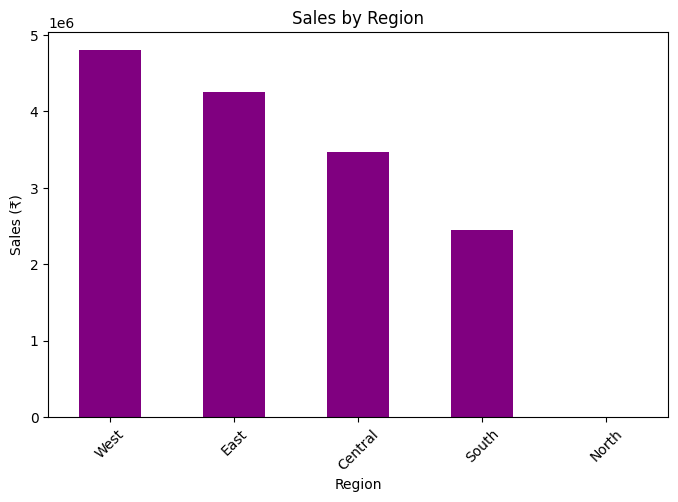

In [ ]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='bar', color='purple', title='Sales by Region')
plt.ylabel('Sales (₹)')
plt.xticks(rotation=45)
plt.show()

# **Top 10 Cities by Sales**

In [ ]:
print("\n === Top 10 Cities by Sales ===")
top_city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).apply(lambda x :f"₹{x:,.2f}")
print(top_city_sales)


 === Top 10 Cities by Sales ===
City
Kanyakumari    ₹706,764.00
Vellore        ₹676,550.00
Bodi           ₹667,177.00
Tirunelveli    ₹659,812.00
Perambalur     ₹659,738.00
Salem          ₹657,093.00
Pudukottai     ₹653,179.00
Tenkasi        ₹643,652.00
Karur          ₹642,273.00
Krishnagiri    ₹637,273.00
Name: Sales, dtype: object


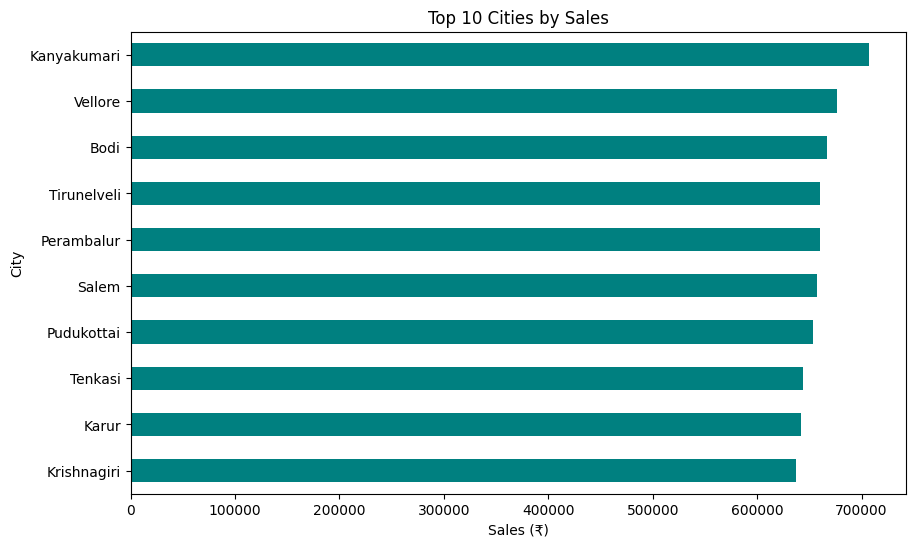

In [ ]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_cities.sort_values().plot(kind='barh', color='teal', title='Top 10 Cities by Sales')
plt.xlabel('Sales (₹)')
plt.show()

# **Monthly Sales Trend**

In [ ]:
from numpy.random.mtrand import f
if df['Order Date'].notna().any():
  df['Year-Month'] = df['Order Date'].dt.to_period('M')
  monthly_sales = df.groupby('Year-Month')['Sales'].sum()
  print( monthly_sales.apply(lambda x : f"₹{x:,.2f}"))

Year-Month
2015-01    ₹111,247.00
2015-02     ₹93,173.00
2015-03     ₹92,674.00
2015-04     ₹83,513.00
2015-05    ₹120,976.00
2015-06     ₹89,021.00
2015-07     ₹96,434.00
2015-08    ₹104,794.00
2015-09    ₹114,152.00
2015-10     ₹66,612.00
2015-11    ₹130,290.00
2015-12     ₹97,769.00
2016-01     ₹93,219.00
2016-02     ₹95,220.00
2016-03    ₹107,069.00
2016-04     ₹70,433.00
2016-05    ₹132,475.00
2016-06     ₹95,887.00
2016-07     ₹88,514.00
2016-08    ₹119,474.00
2016-09    ₹123,145.00
2016-10     ₹90,374.00
2016-11    ₹105,337.00
2016-12    ₹115,823.00
2017-01    ₹139,454.00
2017-02    ₹126,784.00
2017-03    ₹156,997.00
2017-04    ₹152,100.00
2017-05    ₹170,127.00
2017-06    ₹107,330.00
2017-07     ₹92,902.00
2017-08    ₹156,139.00
2017-09     ₹90,763.00
2017-10    ₹145,302.00
2017-11    ₹121,708.00
2017-12    ₹151,663.00
2018-01    ₹156,222.00
2018-02    ₹255,896.00
2018-03    ₹207,677.00
2018-04    ₹145,295.00
2018-05    ₹131,523.00
2018-06    ₹129,101.00
2018-07    ₹152,597.00


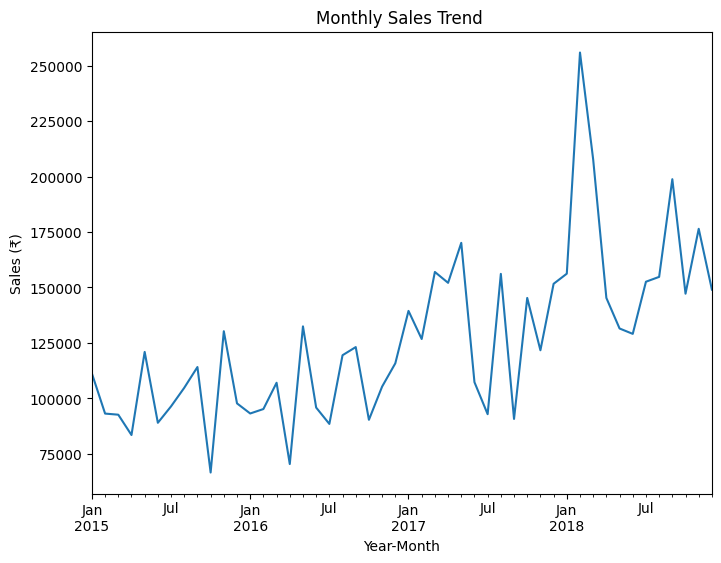

In [ ]:
monthly_sales.plot(kind='line',title='Monthly Sales Trend ', figsize=(8,6))
plt.ylabel('Sales (₹)')
plt.show()

# **Top Customers by Sales**

In [ ]:
print("\n === Top 10 Customers by Sales ===")
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers.apply(lambda x : f"₹{x:,.2f}"))


 === Top 10 Customers by Sales ===
Customer Name
Krithika    ₹334,361.00
Amrish      ₹333,351.00
Verma       ₹331,665.00
Arutra      ₹325,720.00
Vidya       ₹321,798.00
Vinne       ₹319,565.00
Shah        ₹318,588.00
Suresh      ₹315,973.00
Adavan      ₹315,341.00
Surya       ₹312,645.00
Name: Sales, dtype: object


# **Discount impact: Average profit margin by discount range**

In [ ]:
df['Discount Range'] = pd.cut(df['Discount'], bins=[0,0.1,0.2,0.3,0.4],labels=['0-10%','10-20%','20-30%','>30%'] )
print("\n ==== Average Profit Margin By Discount Range ===")
print(df.groupby('Discount Range').apply(lambda x:(x['Profit'].sum()/x['Sales'].sum()) * 100 if x['Sales'].sum() > 0 else 0))


 ==== Average Profit Margin By Discount Range ===
Discount Range
0-10%     24.852782
10-20%    24.959785
20-30%    25.226011
>30%      24.916560
dtype: float64


/tmp/ipython-input-4148525894.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Discount Range').apply(lambda x:(x['Profit'].sum()/x['Sales'].sum()) * 100 if x['Sales'].sum() > 0 else 0))
/tmp/ipython-input-4148525894.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Discount Range').apply(lambda x:(x['Profit'].sum()/x['Sales'].sum()) * 100 if x['Sales'].sum() > 0 else 0))


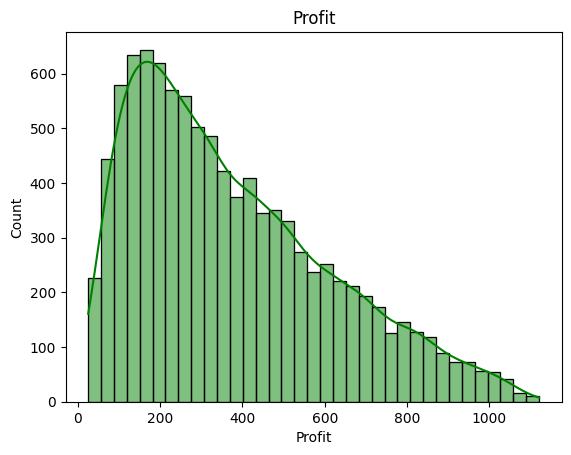

In [ ]:
sns.histplot(df['Profit'],kde=10,color='green')
plt.title('Profit')
plt.show()

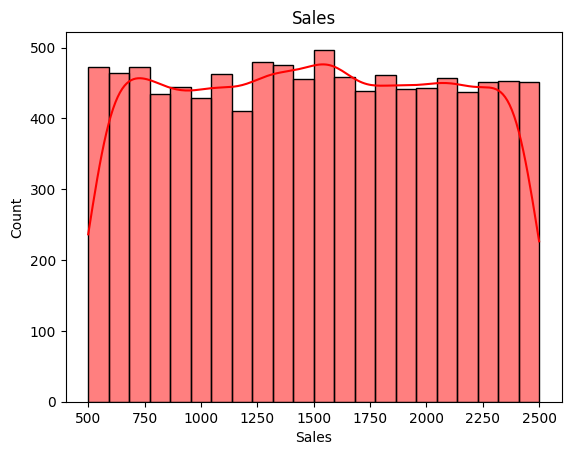

In [ ]:
sns.histplot(df['Sales'],kde=10,color='red')
plt.title('Sales')
plt.show()

In [ ]:
df[['Profit','Sales','Discount']].corr()

,Profit,Sales,Discount
Profit,1.000000,0.605349,0.000017
Sales,0.605349,1.000000,-0.005512
Discount,0.000017,-0.005512,1.000000


In [ ]:
grouped = df.groupby('Category')[['Profit','Sales']].agg(['mean','sum','count'])

In [ ]:
df.groupby('Region')[['Profit','Sales']].agg(['mean','sum','count'])

Profit                          Sales               
               mean         sum count         mean      sum count
Region                                                           
Central  368.836350   856806.84  2323  1492.964270  3468156  2323
East     377.228083  1074345.58  2848  1491.702247  4248368  2848
North    401.280000      401.28     1  1254.000000     1254     1
South    385.153113   623562.89  1619  1507.387894  2440461  1619
West     372.152548  1192004.61  3203  1498.202623  4798743  3203

In [ ]:
df.groupby('Sub Category')[['Profit','Sales']].agg(['mean','sum','count'])

Profit                         Sales               
                          mean        sum count         mean      sum count
Sub Category                                                               
Atta & Flour        362.212748  127861.10   353  1514.586402   534649   353
Biscuits            368.970850  169357.62   459  1490.376906   684083   459
Breads & Buns       380.009920  190764.98   502  1479.254980   742586   502
Cakes               372.562965  168398.46   452  1516.840708   685612   452
Chicken             356.465201  124049.89   348  1495.681034   520497   348
Chocolates          368.435551  183849.34   499  1470.737475   733898   499
Cookies             366.622500  190643.70   520  1477.332692   768213   520
Dals & Pulses       379.685977  130232.29   343  1525.862974   523371   343
Edible Oil & Ghee   373.821685  168593.58   451  1481.343681   668086   451
Eggs                381.714828  144669.92   379  1517.562005   575156   379
Fish                399.046098  147248.01   369  1519.100271   560548   369
Fresh Fruits        364.954878  134668.35   369  1493.799458   551212   369
Fresh Vegetables    370.828616  131273.33   354  1485.429379   525842   354
Health Drinks       372.002490  267469.79   719  1462.363004  1051439   719
Masalas             365.008877  168999.11   463  1506.436285   697480   463
Mutton              384.237056  151389.40   394  1551.269036   611200   394
Noodles             391.284465  193685.81   495  1485.727273   735435   495
Organic Fruits      376.041178  130862.33   348  1446.557471   503402   348
Organic Staples     387.464758  144136.89   372  1502.497312   558929   372
Organic Vegetables  385.003948  133596.37   347  1499.340058   520271   347
Rice                384.643515  126932.36   330  1510.069697   498323   330
Soft Drinks         379.054288  258135.97   681  1518.170338  1033874   681
Spices              358.618792  160302.60   447  1505.315436   672876   447

In [ ]:
df.groupby('City')[['Profit','Sales']].agg(['mean','sum','count'])

Profit                         Sales              
                      mean        sum count         mean     sum count
City                                                                  
Bodi            392.884910  173655.13   442  1509.450226  667177   442
Chennai         372.503079  160921.33   432  1469.821759  634963   432
Coimbatore      367.755631  157399.41   428  1483.056075  634748   428
Cumbum          374.952350  156355.13   417  1501.311751  626047   417
Dharmapuri      376.577261  141593.05   376  1520.087766  571553   376
Dindigul        365.840783  144872.95   396  1453.613636  575631   396
Kanyakumari     375.202048  172217.74   459  1539.790850  706764   459
Karur           393.734744  169305.94   430  1493.658140  642273   430
Krishnagiri     364.721545  160477.48   440  1448.347727  637273   440
Madurai         373.893652  152548.61   408  1514.303922  617836   408
Nagercoil       369.566944  137848.47   373  1478.378016  551435   373
Namakkal        361.047395  145502.10   403  1485.186104  598530   403
Ooty            371.482475  150078.92   404  1483.396040  599292   404
Perambalur      394.313802  171132.19   434  1520.133641  659738   434
Pudukottai      381.564256  164072.63   430  1519.020930  653179   430
Ramanadhapuram  377.555891  158951.03   421  1506.855107  634386   421
Salem           373.316241  160899.30   431  1524.577726  657093   431
Tenkasi         361.645185  156230.72   432  1489.935185  643652   432
Theni           368.836641  142739.78   387  1497.552972  579553   387
Tirunelveli     370.334103  165169.01   446  1479.399103  659812   446
Trichy          381.120280  136059.94   357  1516.535014  541403   357
Vellore         400.167839  174073.01   435  1555.287356  676550   435
Viluppuram      363.225793  144200.64   397  1464.166247  581274   397
Virudhunagar    362.540120  150816.69   416  1458.701923  606820   416

=== Normality Tests ===

Sales (n=9994)
  D'Agostino K²: statistic=7835.1431, p-value=0.0000e+00
  Skewness: 0.0009 (normal ~ 0)
  Kurtosis: 1.8117 (normal ~ 3)

Profit (n=9994)
  D'Agostino K²: statistic=797.9366, p-value=5.3736e-174
  Skewness: 0.7673 (normal ~ 0)
  Kurtosis: 2.8181 (normal ~ 3)

Discount (n=9994)
  D'Agostino K²: statistic=7069.7240, p-value=0.0000e+00
  Skewness: -0.0265 (normal ~ 0)
  Kurtosis: 1.8239 (normal ~ 3)



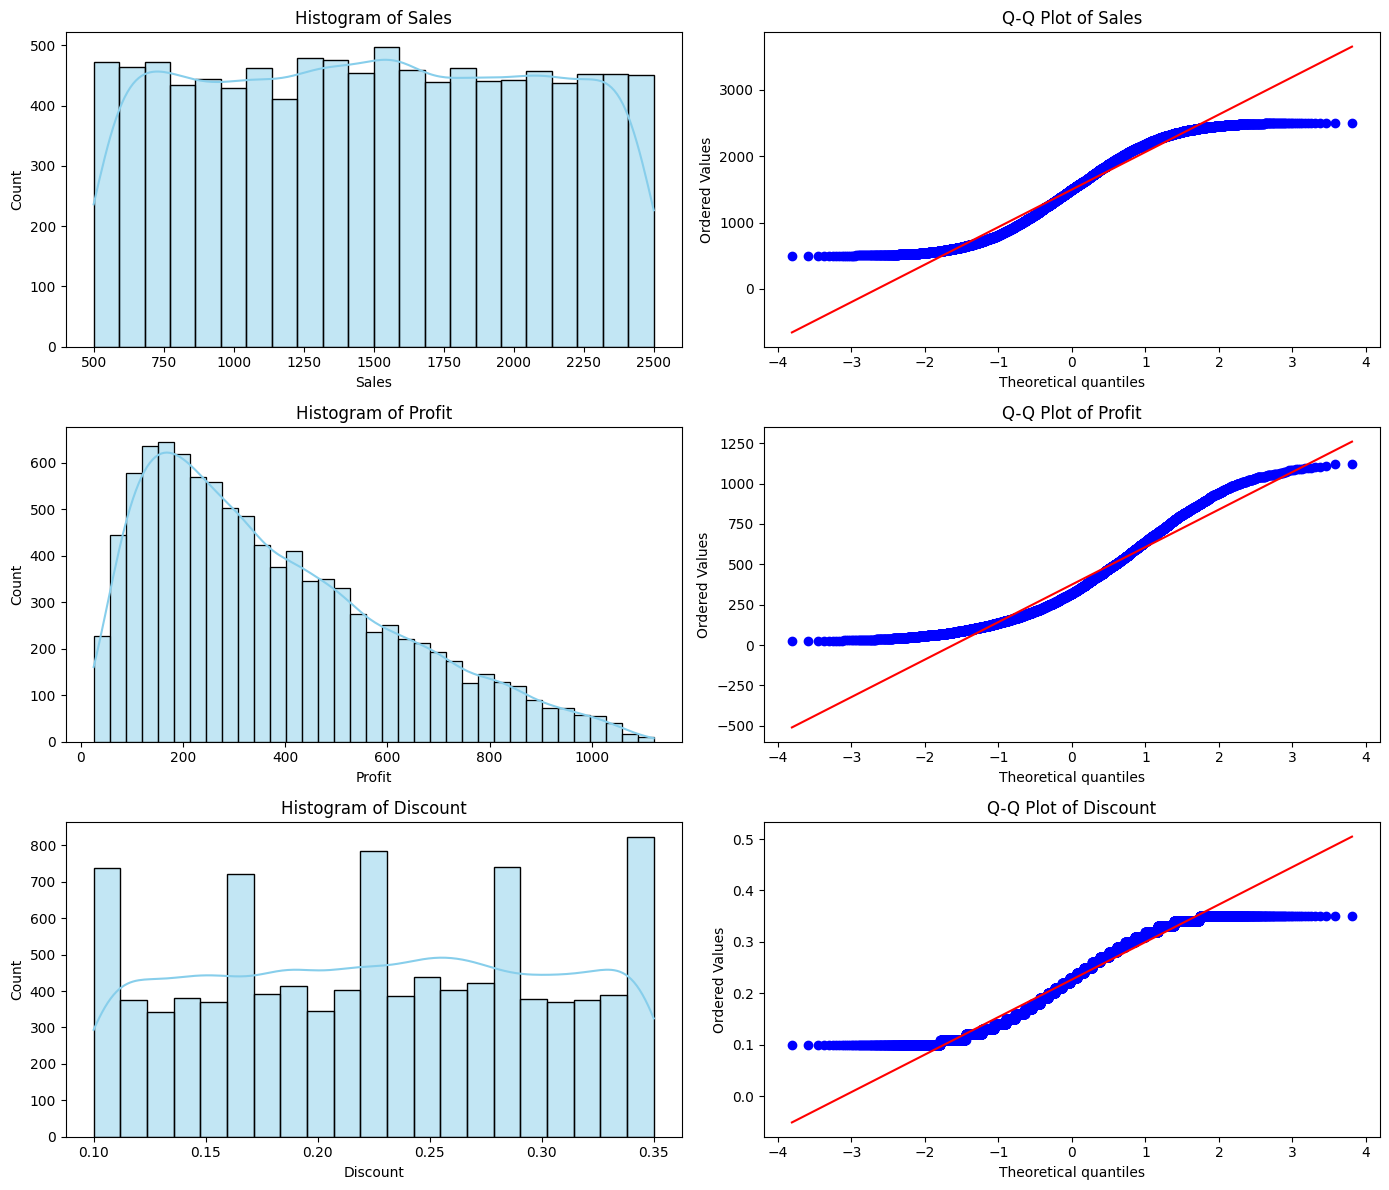

In [ ]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume df is already loaded and cleaned (Sales, Profit, Discount as numeric)

# Variables to test
variables = {'Sales': df['Sales'], 'Profit': df['Profit'], 'Discount': df['Discount']}

# === Statistical Tests ===
print("=== Normality Tests ===\n")
for name, data in variables.items():
    data = data.dropna()
    print(f"{name} (n={len(data)})")

    # Shapiro-Wilk (reliable for n < 5000)
    if len(data) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(data)
        print(f"  Shapiro-Wilk: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4e}")

    # D'Agostino K²
    dag_stat, dag_p = stats.normaltest(data)
    print(f"  D'Agostino K²: statistic={dag_stat:.4f}, p-value={dag_p:.4e}")

    # Skewness & Kurtosis
    print(f"  Skewness: {stats.skew(data):.4f} (normal ~ 0)")
    print(f"  Kurtosis: {stats.kurtosis(data) + 3:.4f} (normal ~ 3)\n")

# === Visualizations ===
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, (name, data) in enumerate(variables.items()):
    data = data.dropna()

    # Histogram + KDE
    sns.histplot(data, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram of {name}')

    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {name}')

plt.tight_layout()
plt.show()

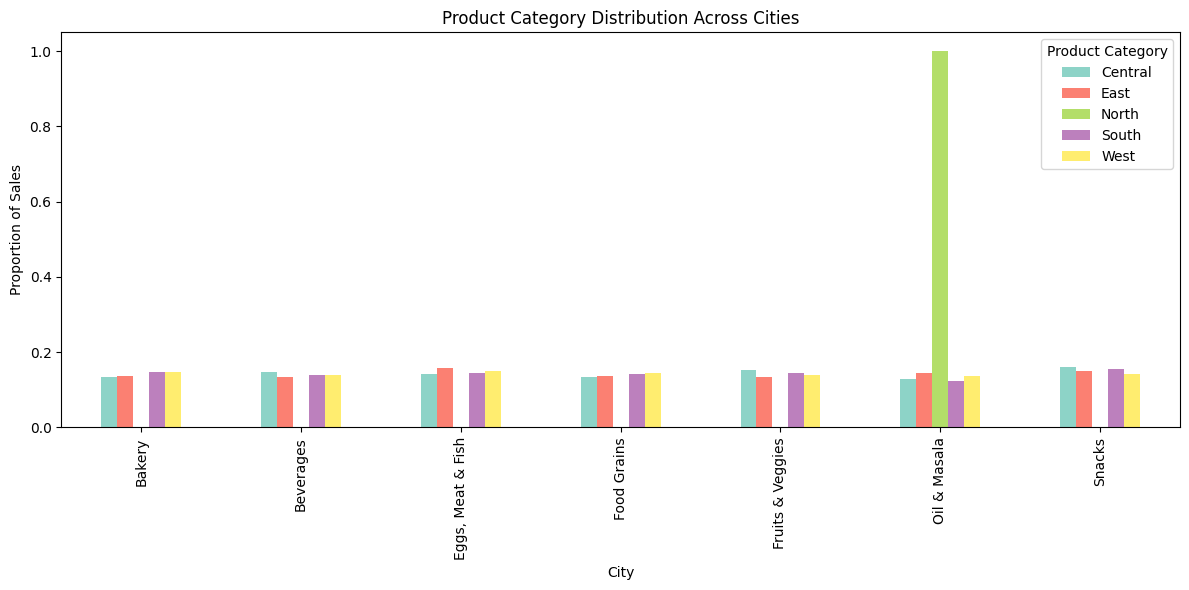

In [ ]:
crosstab = pd.crosstab(
    df['Category'],
    df['Region'],
    normalize='columns'
)

crosstab.plot(
    kind='bar',
    figsize=(12, 6),
    colormap='Set3'
)

plt.title('Product Category Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Proportion of Sales')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


In [ ]:
grouped = df.groupby('City')[['Sales','Profit','Discount']].mean().round(2)

In [ ]:
grouped

,Sales,Profit,Discount
City,,,
Bodi,1509.45,392.88,0.22
Chennai,1469.82,372.50,0.23
Coimbatore,1483.06,367.76,0.22
Cumbum,1501.31,374.95,0.23
Dharmapuri,1520.09,376.58,0.23
Dindigul,1453.61,365.84,0.22
Kanyakumari,1539.79,375.20,0.22
Karur,1493.66,393.73,0.23
Krishnagiri,1448.35,364.72,0.23
